<a href="https://colab.research.google.com/github/jong9810/TensorFlow-2.0/blob/main/8_GRU_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GRU (Gate Recurrent Unit) 개념, 구조, 동작원리

## GRU 개요
1. GRU는 LSTM 구조와 비슷하지만, 더 간단한 구조여서 계산상으로 이점이 있음
1. GRU는 LSTM에서 사용되는 cell state가 없는 대신에 GRU 출력 H 값이 그 역할을 대신함.
1. GRU 내부 구조는 Reset Gate, Update Gate의 두 가지만 존재하며, 이때 활성화 함수로 sigmoid가 2번, tanh기 1번 사용되기 때문에 LSTM에 비해 연산량을 줄일 수 있음.

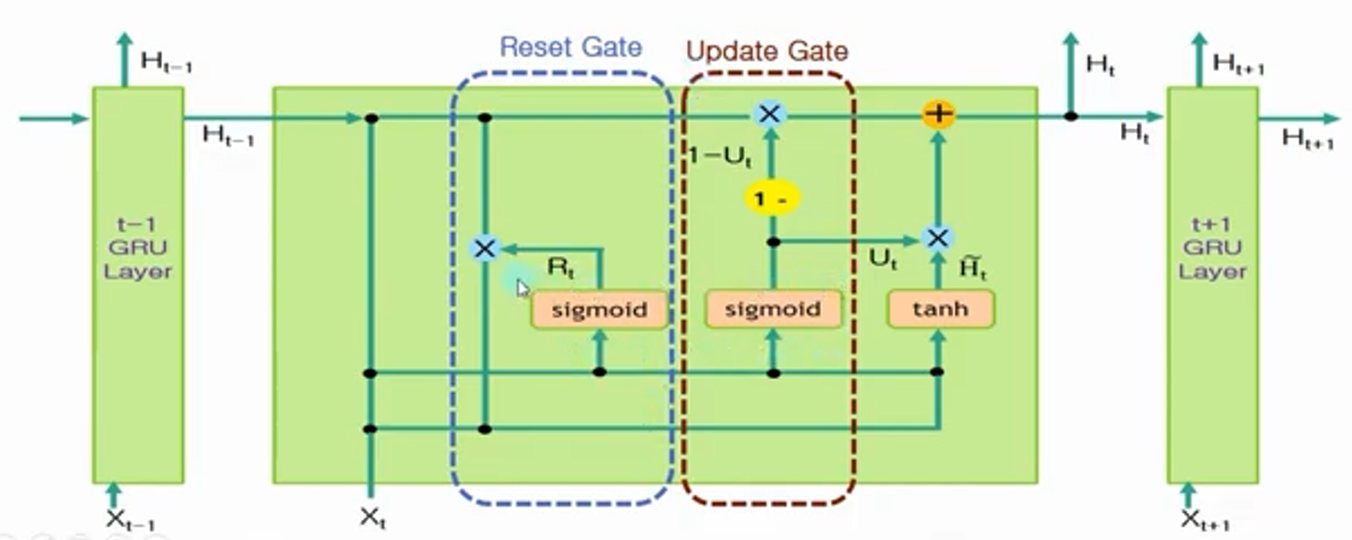

## GRU 구조 - Reset Gate

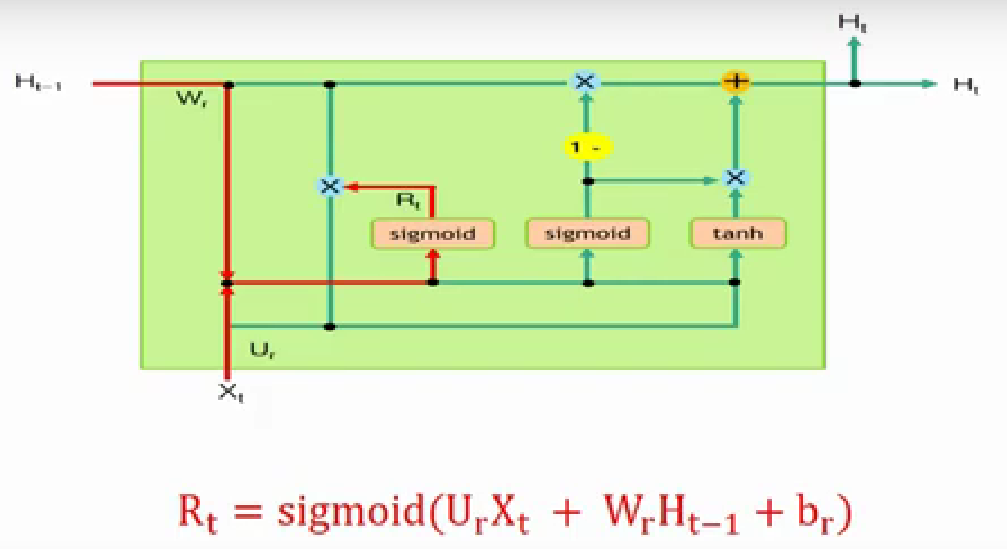

- Reset Gate (Rt) : 과거의 정보를 얼마나 잊을지(또는 기억할지) 결정하는 게이트이다.
- 즉, 현재 시점의 데이터와 과거의 은닉층 출력값에 각각 가중치를 곱한 후 더하여 sigmoid 함수를 적용한 값이다. 
- Rt는 0 ~ 1 값을 가지고, 0에 가까울 수록 과거 데이터를 더 많이 기억한다.
- Xt, Ur : 현재 시점의 데이터, 가중치
- Ht-1, Wr : 과거의 은닉층 출력값, 가중치
- br : Reset Gate의 sigmoid 함수를 적용하기 전 더해주는 바이어스 값
- Ur, Wr, br를 업데이트해서 최적의 값을 찾아야 함


## GRU 구조 - Update Gate

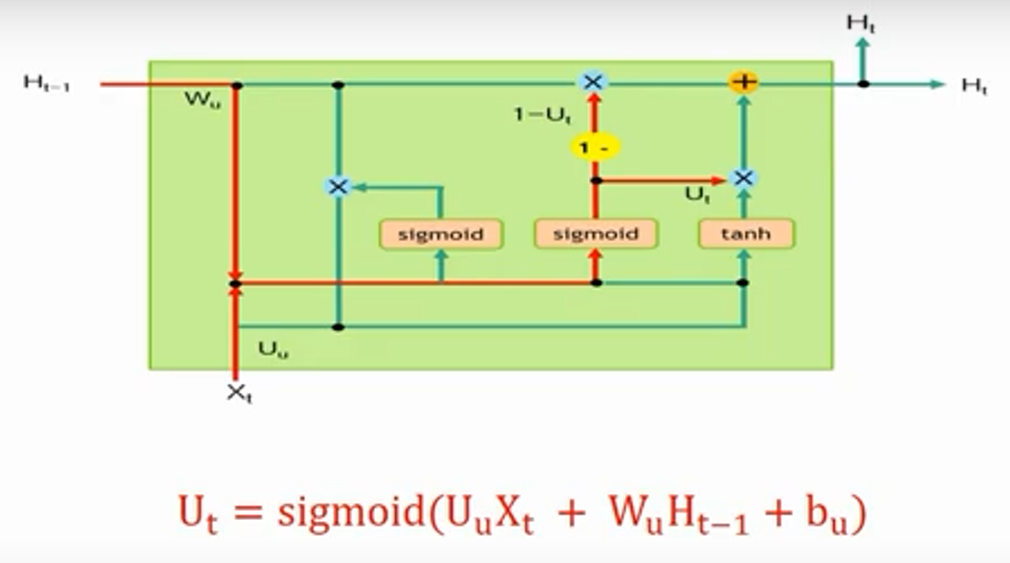

- Update Gate (Ut) : 과거와 현재의 정보 가운데 어떤 정보를 더 많이 업데이트할 지를 결정하는 게이트이다.
- Ut : 현재 시점에서 가져가야할 데이터의 양
- 1 - Ut : 잊어버려야할 데이터의 양
- GRU의 Update Gate는 LSTM의 Input Gate와 Forget Gate를 합쳐놓은 개념이다.
- Xt, Uu : 현재 시점의 데이터, 가중치
- Ht-1, Wu : 과거의 은닉층 출력값, 가중치
- bu : Update Gate의 sigmoid 함수를 적용하기 전 더해주는 바이어스 값
- Uu, Wu, bu를 업데이트해서 최적의 값을 찾아야 함

## GRU 구조 - Candidate (데이터 선정)

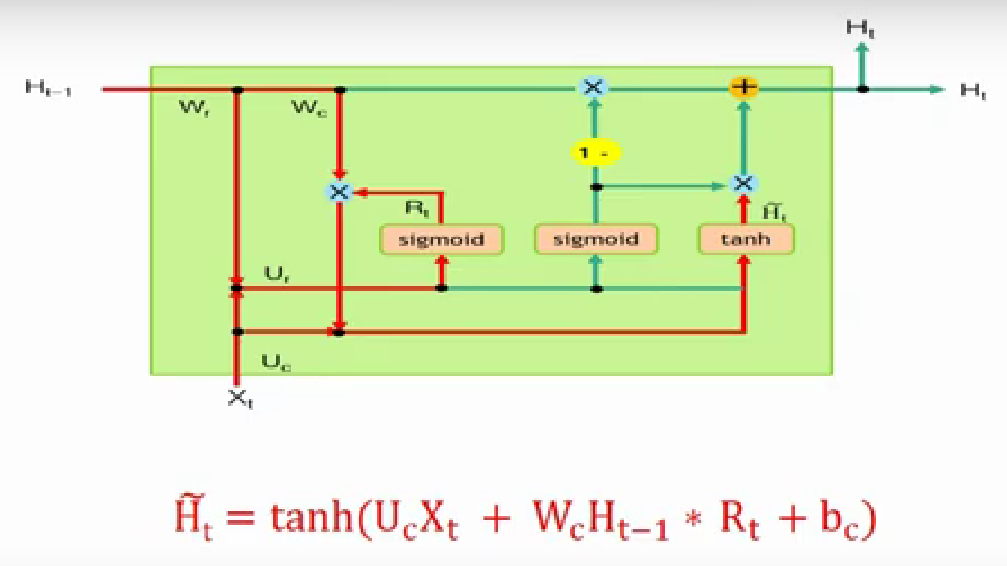

- Candidate 단계는 다음 시점으로 전달해줄 데이터 Ht를 만들기 위해, 현재 시점의 데이터를 선정하는 단계이다.
- 데이터 선정 단계에서의 핵심은 과거 GRU 층의 출력값(Ht-1)과 리셋된 데이터 값(Rt)을 이용해서 pointwise 곱 연산을 함으로써, 현시점의 데이터(Xt)와 일정 부분 리셋된 과거 데이터를 가지고 H~t 데이터를 생성하는 것이다.
- H~t : Candidate 단계의 출력값, 다음 시점으로 전달해줄 현재 시점의 데이터를 선정
- Xt, Uc : 현재 시점의 데이터, 가중치
- Ht-1, Wc : 과거(이전 time step)의 은닉층 출력값, 가중치
- Rt : Reset Gate의 출력값
- bc : Candidate 단계에서 tanh 함수를 적용하기 전 더해주는 바이어스 값
- Uc, Wc, bc를 업데이트해서 최적의 값을 찾는 것이 목표이다.

## GRU 구조 - Output (출력값 계산)

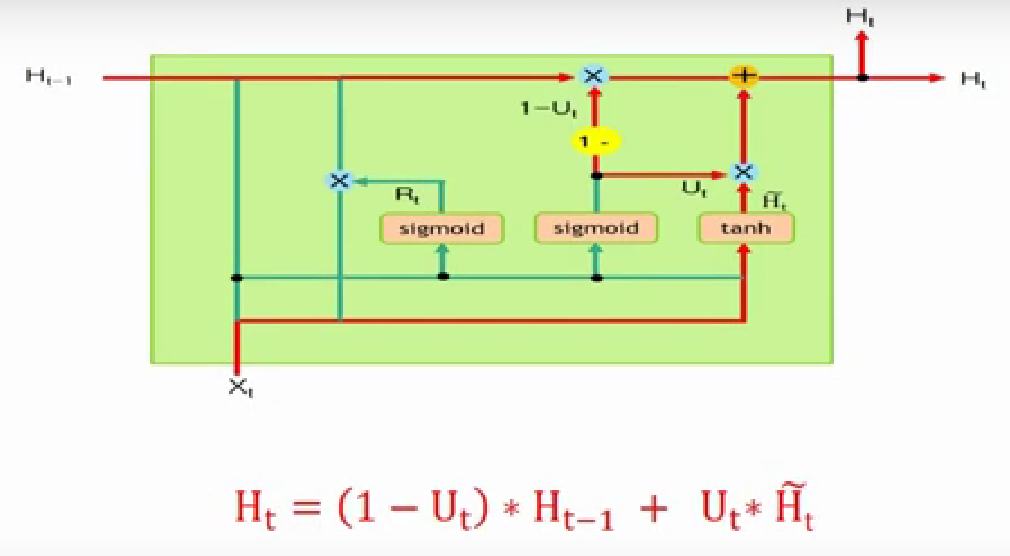

- 수식의 Ut 부분은 현재 시점의 데이터를 얼마나 가져갈 것인가를 나타내며, 1 - Ut 부분은 현재 시점의 데이터를 얼마나 잊을 것인가를 나타낸다.
- (1 - Ut) * Ht-1 : 이전 time step에서 출력값 Ht-1에서 얼마만큼 잊을지를 나타냄.
- Ut * H~t : 현 시점의 데이터 가운데 얼마만큼 다음 단계로 가져갈 것인가를 계산한 것임.
- 따라서, GRU의 최종 출력값 Ht는 현재와 과거 데이터를 학습된 비율로 모두 합한 값이라고 할 수 있다.

## GRU 요약

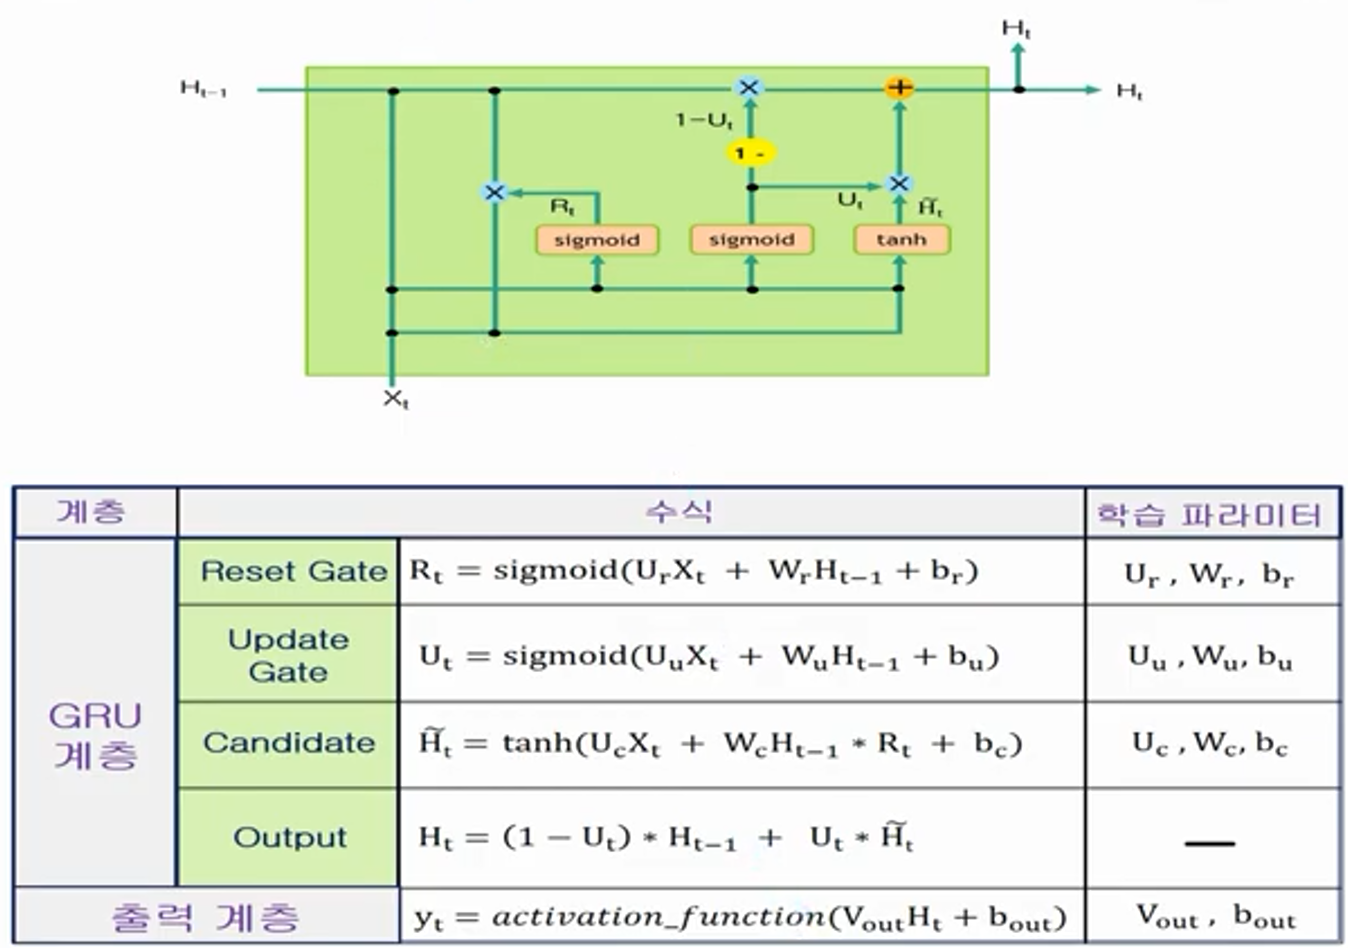